In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

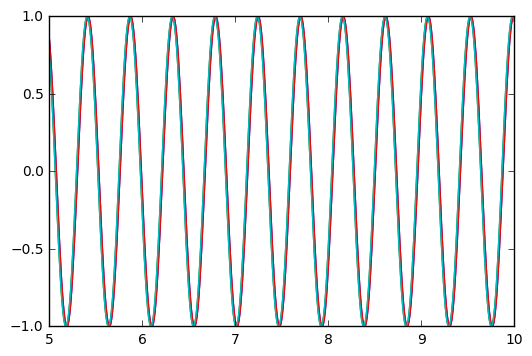

In [3]:
f=open("../test.log",'r')
time=[]
u0=[]
uf=[]
for line in f:
    line=line.split(' ')
    time.append(float(line[0]))
    u0.append(float(line[1]))
    uf.append(float(line[len(line)-1]))
f.close()
plt.plot(time,u0,time,uf)
plt.xlim(5,10)
plt.show()

/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


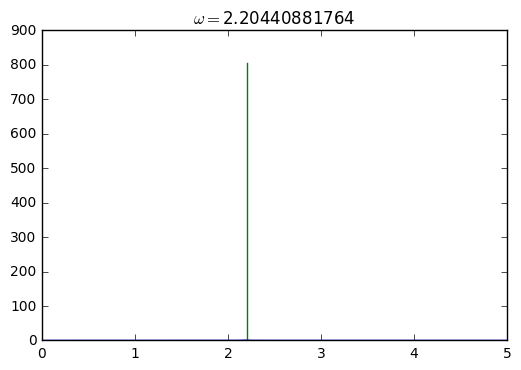

In [8]:
from scipy.fftpack import fft
yf=fft(np.array(uf))
N=int(100*max(time))
T=0.01
x=np.linspace(0,N*T,N)
xf=np.linspace(0,1.0/(2.0*T),N/2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.xlim(0,5)
omega = xf[np.argmax(2.0/N * np.abs(yf[0:N/2]))]
plt.plot((omega,omega),(0,yf[np.argmax(2.0/N*np.abs(yf[0:N/2]))]))
plt.title(r"$\omega = $" + str(omega))
plt.show()

In [73]:
yf=fft(np.array(uf))


In [25]:
max(time)

19.9901

In [33]:
T=np.arange(0,19.99,0.01)

In [36]:
T[1998]

19.98

In [43]:
N=1999
T=0.01
x=np.linspace(0,N*T,N)

In [46]:
x[0]

0.0

In [47]:
xf=np.linspace(0,1.0/(2.0*T),N/2)

In [74]:
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.xlim(0,5)

(0, 5)

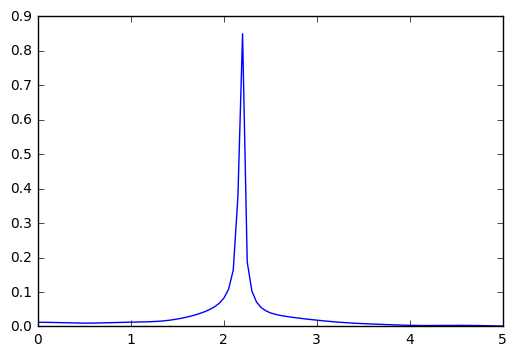

In [75]:
plt.show()

In [53]:
0.35*2*np.pi

2.199114857512855

In [77]:
Y=2.0/N * np.abs(yf[0:N/2])

In [56]:
Y.index(max(Y))

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [78]:
np.argmax(Y)

44

In [79]:
Y[44]

0.8497577650497401

In [80]:
xf[44]/(2*np.pi)

0.3508425599220138

In [81]:
xf[44]

2.2044088176352705

In [201]:
f=open("../test_filament.spiral_struct")
f.readline()
line=f.readline()
line=line.split(" ")
avgPos = [float(line[0]),float(line[1])]
rx=[]
ry=[]
ux=[]
uy=[]
for line in f:
    line = line.split(" ")
    rx.append(float(line[0])-avgPos[0]-2)
    ry.append(float(line[1])-avgPos[1])
    ux.append(float(line[2]))
    uy.append(float(line[3]))
f.close()
f,a=plt.subplots(1,3,figsize=(35,10))
a[0].plot(rx,ry)
a[0].set_title("Top-down view of final spool configuration with L=100, F_a = 10, L_p/L = 10")
a[0].set_xlabel("X")
a[0].set_ylabel("Y")

In [202]:
X = [np.sqrt(rx[i]**2+ry[i]**2) for i in range(0,len(rx))]
a[1].plot(range(0,len(rx)),X)
a[1].set_title("Distance to spool from center as a function of arc-length")
a[1].set_xlabel("Arc Length")
a[1].set_ylabel("Distance from spool center")
ticks_x = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(2.9*x))
a[1].xaxis.set_major_formatter(ticks_x)

In [203]:
angles=[]
for i in range(len(ux)-2):
    dp=ux[i]*ux[i+1]+uy[i]*uy[i+1]
    if dp>1:
        dp=1
    angles.append(np.arccos(dp))
a[2].plot(angles)
ticks_x = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(2.9*x))
a[2].xaxis.set_major_formatter(ticks_x)
a[2].set_title("Local angle of curvature as a function of arc-length")
a[2].set_xlabel("Arc length")
a[2].set_ylabel("Local angle of curvature")
plt.savefig("/Users/jeff/Desktop/spool_structure.png",bbox_inches='tight')

In [57]:
f=open("../test2_filament.spiral_struct")
f.readline()
line=f.readline()
line=line.split(" ")
avgPos = [float(line[0]),float(line[1])]
rx=[]
ry=[]
ux=[]
uy=[]
for line in f:
    line = line.split(" ")
    rx.append(float(line[0])-avgPos[0]-0.2)
    ry.append(float(line[1])-avgPos[1]+0.3)
    ux.append(float(line[2]))
    uy.append(float(line[3]))
f.close()
f,a=plt.subplots(1,3,figsize=(35,10))
a[0].plot(rx,ry)
a[0].set_title("Top-down view of final spool configuration with L=100, F_a = 10, L_p/L = 1")
a[0].set_xlabel("X")
a[0].set_ylabel("Y")

In [58]:
X = [np.sqrt(rx[i]**2+ry[i]**2) for i in range(0,len(rx))]
a[1].plot(range(0,len(rx)),X)
a[1].set_title("Distance to spool from center as a function of arc-length")
a[1].set_xlabel("Arc Length")
a[1].set_ylabel("Distance from spool center")
ticks_x = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(2.9*x))
a[1].xaxis.set_major_formatter(ticks_x)

In [59]:
angles=[]
for i in range(len(ux)-2):
    dp=ux[i]*ux[i+1]+uy[i]*uy[i+1]
    if dp>1:
        dp=1
    angles.append(np.arccos(dp))
a[2].plot(angles)
ticks_x = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(2.9*x))
a[2].xaxis.set_major_formatter(ticks_x)
a[2].set_title("Local angle of curvature as a function of arc-length")
a[2].set_xlabel("Arc length")
a[2].set_ylabel("Local angle of curvature")
plt.savefig("/Users/jeff/Desktop/spool_structure_tight.png",bbox_inches='tight')
#plt.show()

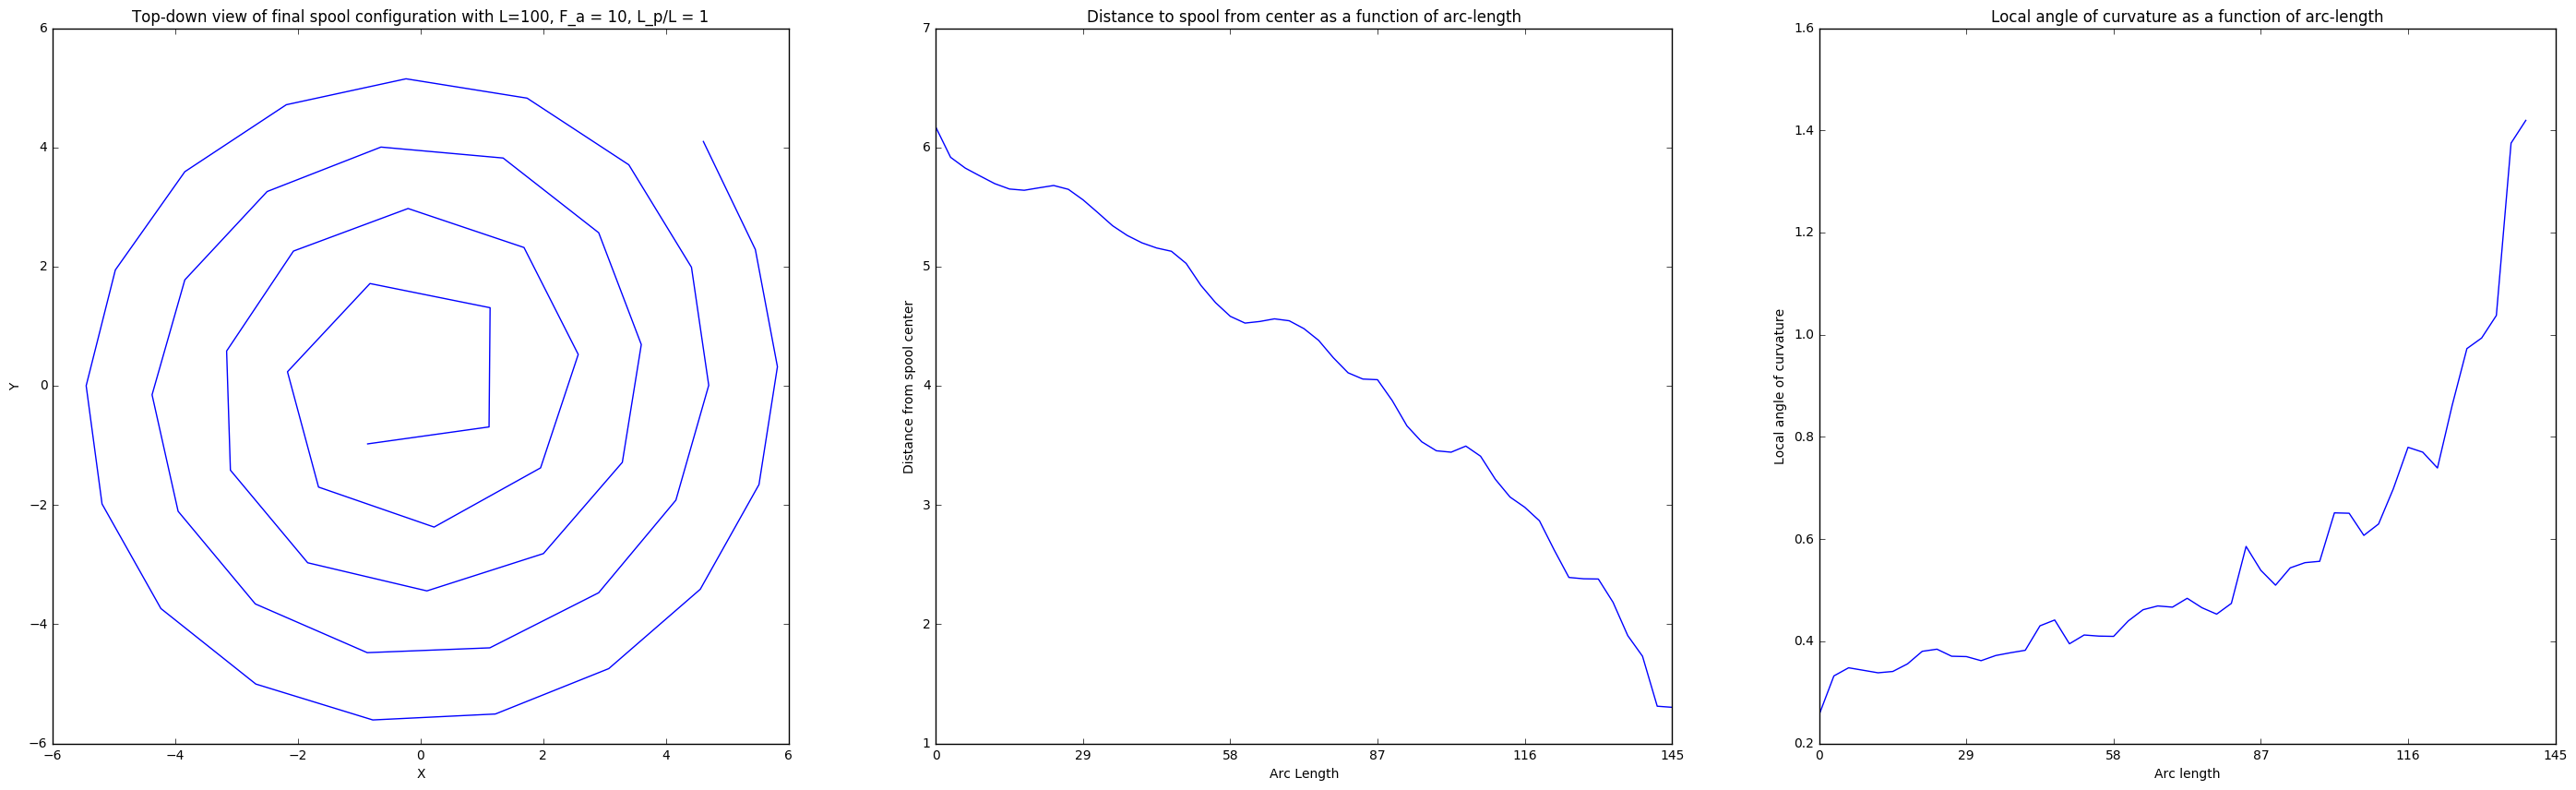

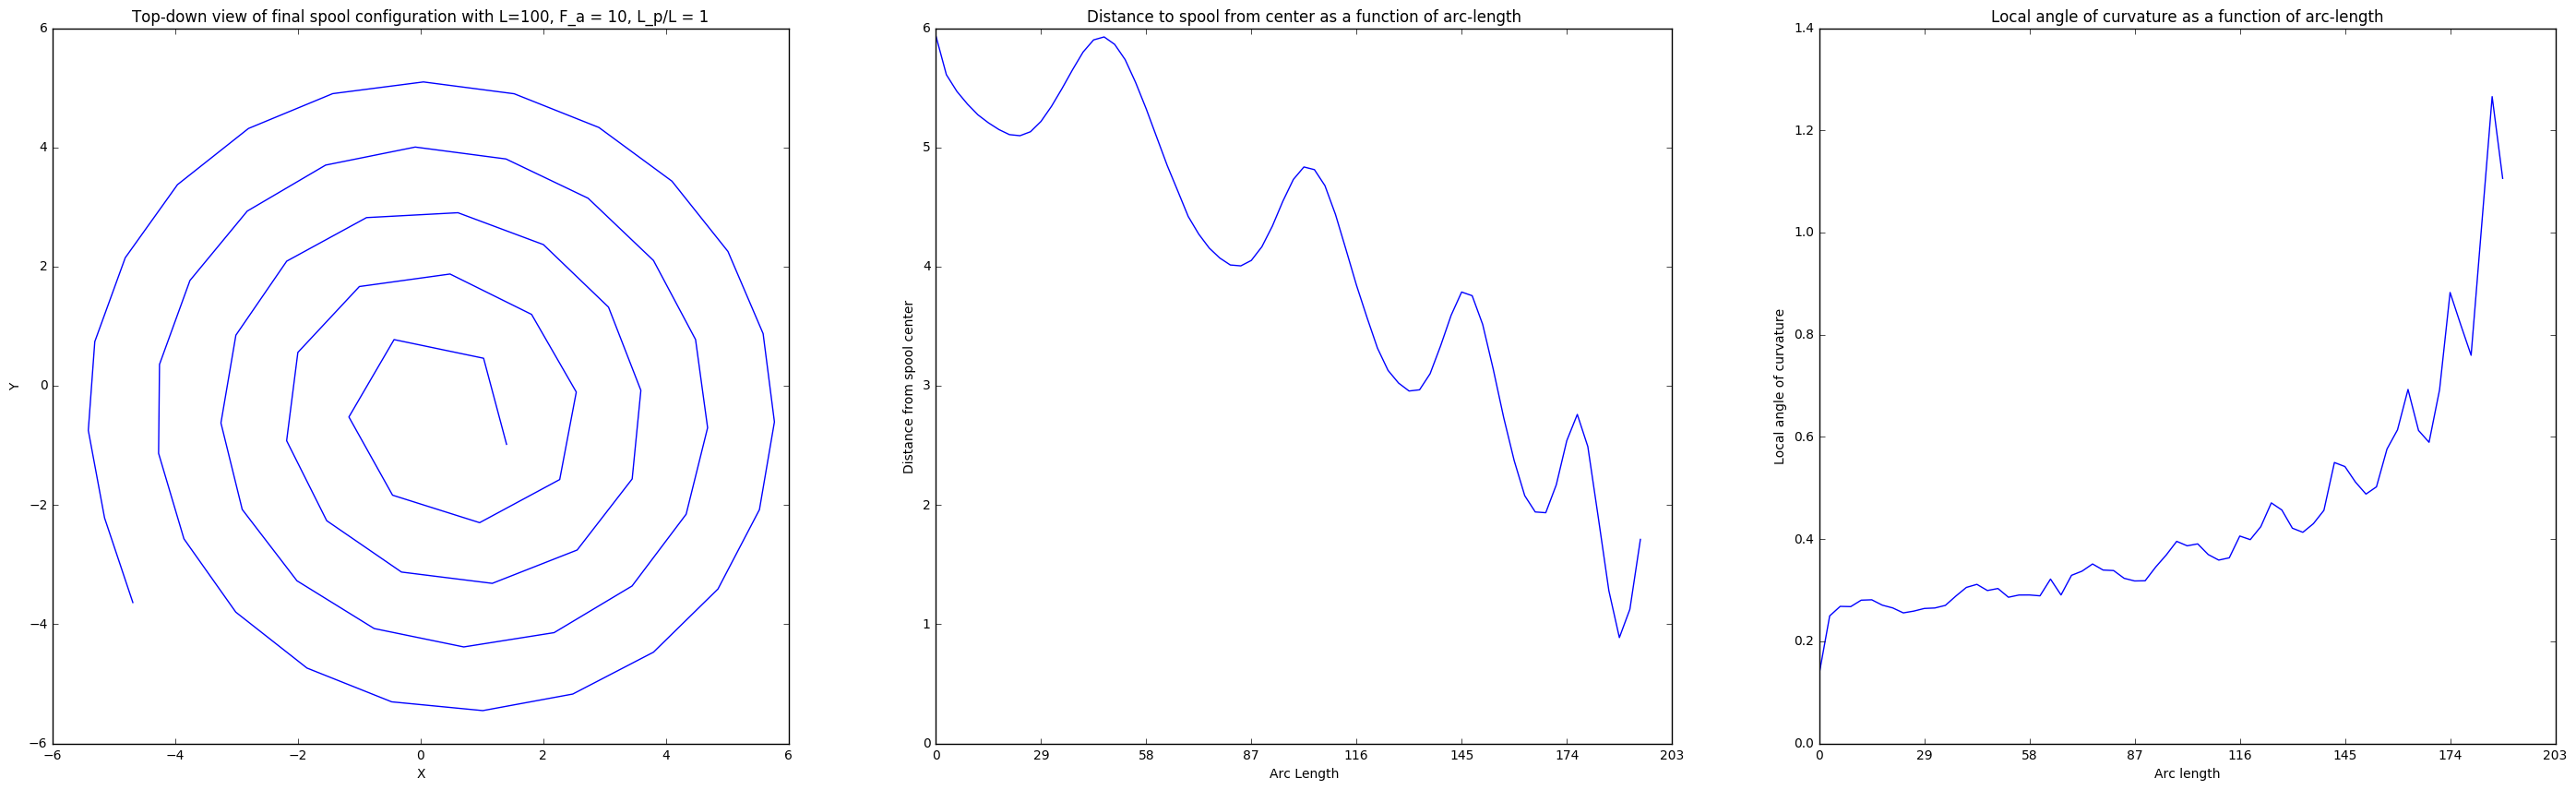

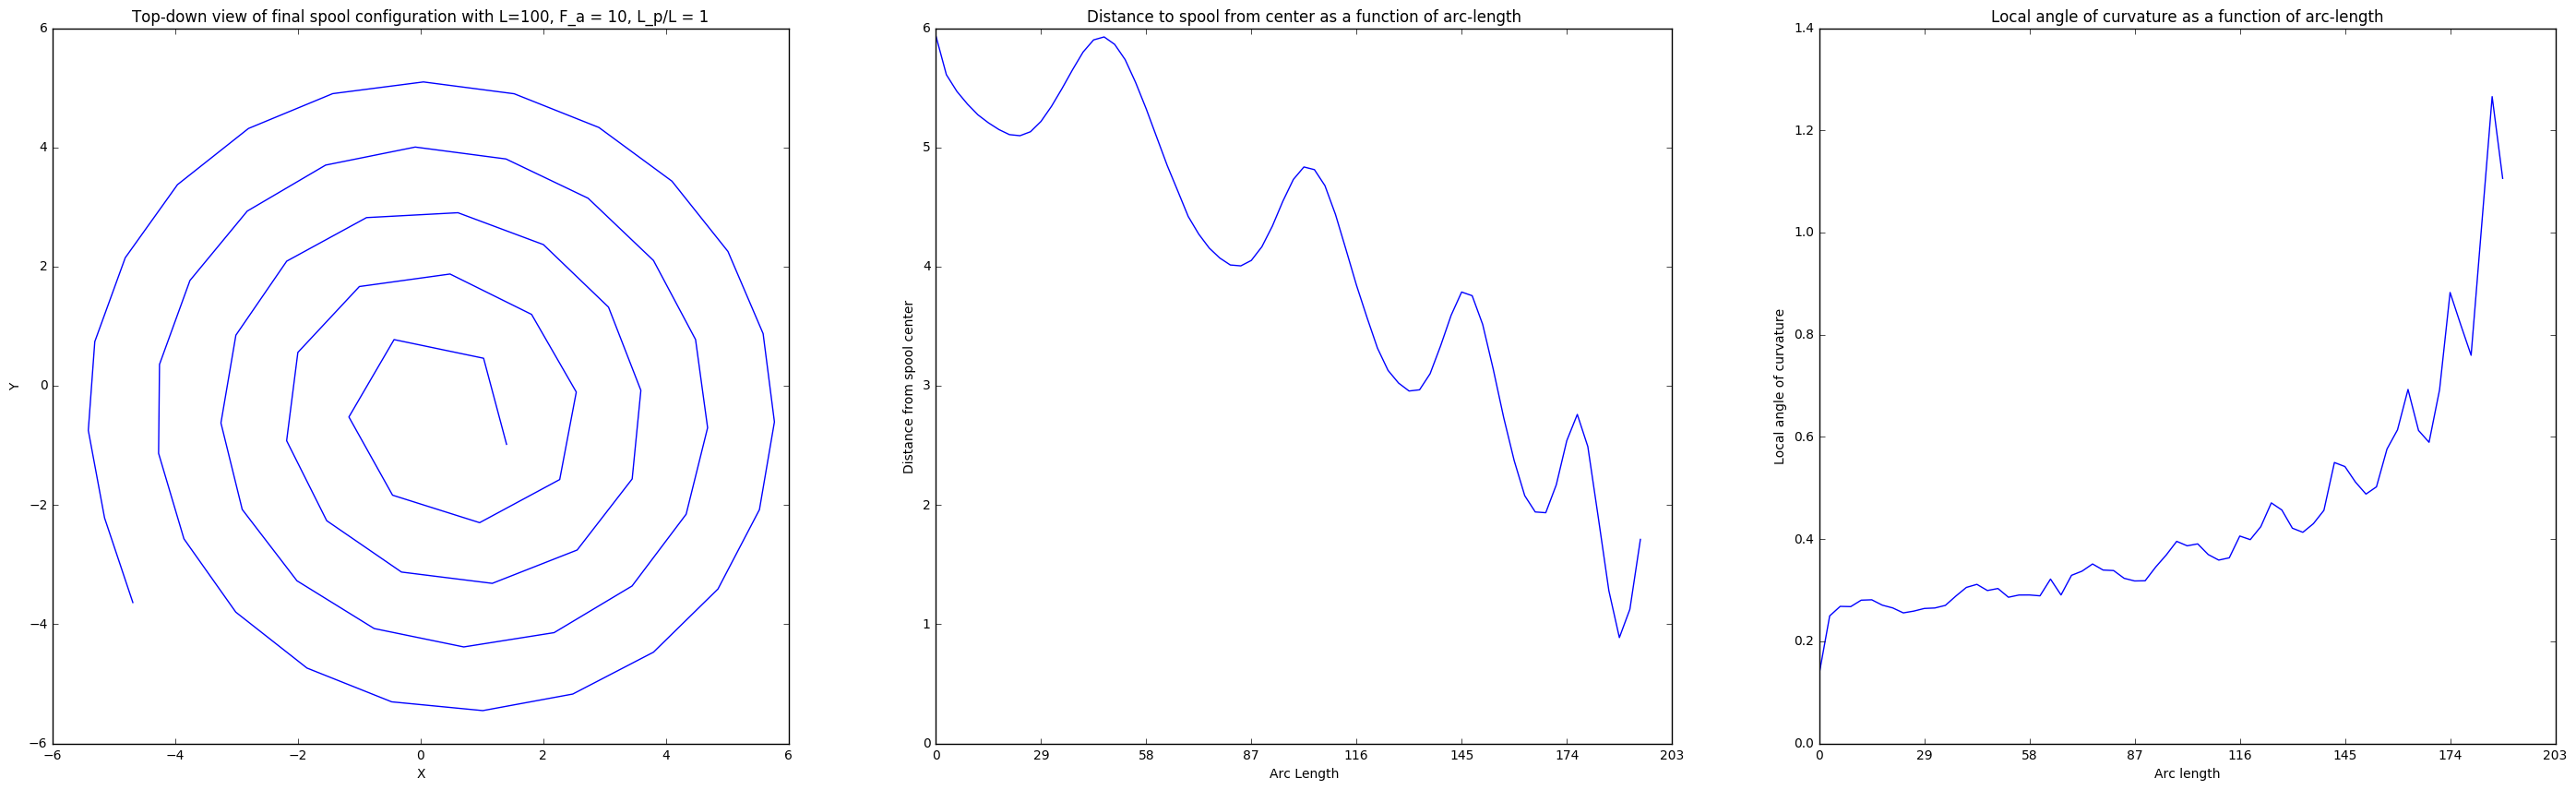

In [21]:
#plt.savefig("/Users/jeff/Desktop/spool_structure_tight.png",bbox_inches='tight')
plt.show()

In [140]:
frPar = 4.0/3.0 * 100.0/(33*np.log(100))
dr=10

In [145]:
2*dr/(frPar*13)

1.7535071092800814

In [137]:
80/(2*np.pi)

12.732395447351628

In [143]:
np.mean(X)

14.327668241227595

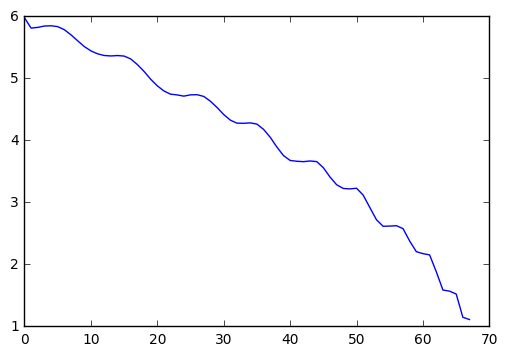

In [52]:
f=open("../test2_filament.spiral_struct")
f.readline()
line=f.readline()
line=line.split(" ")
avgPos = [float(line[0]),float(line[1])]
rx=[]
ry=[]
ux=[]
uy=[]
for line in f:
    line = line.split(" ")
    rx.append(float(line[0])-avgPos[0]-0.2)
    ry.append(float(line[1])-avgPos[1]+0.3)
    ux.append(float(line[2]))
    uy.append(float(line[3]))
f.close()
X = [np.sqrt(rx[i]**2+ry[i]**2) for i in range(0,len(rx))]
plt.plot(range(0,len(rx)),X)
plt.show()